# Matplotlib and Seaborn: Univariate Visualisations
#python/matplotlib
#python/seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   
5   6   charizard              1     1.7    90.5              240   fire   
6   7    squirtle              1     0.5     9.0               63  water   
7   8   wartortle              1     1.0    22.5              142  water   
8   9   blastoise              1     1.6    85.5              239  water   
9  10    caterpie              1     0.3     2.9               39    bug   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65  
5  flying  78      84       78    100             109               85  
6     NaN  44      48       65     43              50               64  
7     NaN  59      63       80     58              65               80  
8     NaN  79      83      100     78              85              105  
9     NaN  45      30       35     45              20               20

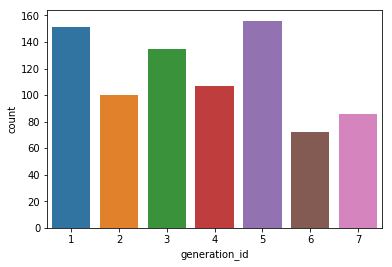

In [14]:
sb.countplot(data = pokemon, x = 'generation_id');

In [12]:
#set a single base colour 
base_colour = sb.color_palette()[0]

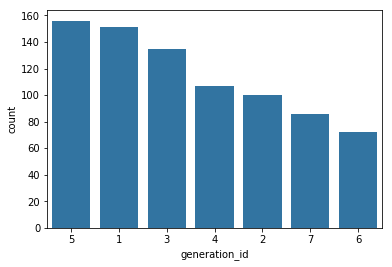

In [19]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_colour,
            order = gen_order);

Now, we might want to sort the generation ids so that they are in descending order of pokemon added.

In [18]:
gen_order = pokemon['generation_id'].value_counts().index

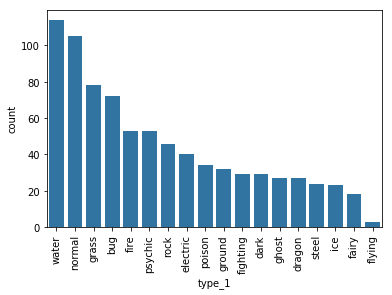

In [22]:
sb.countplot(data = pokemon,
            x = 'type_1',
            color = base_colour,
            order = pokemon['type_1'].value_counts().index);
plt.xticks(rotation = 90);

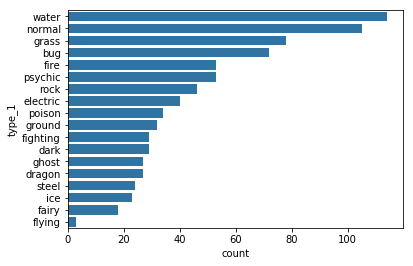

In [24]:
#Alternatively, plot as a horizontal chart by setting the variable to y instead of x
sb.countplot(data = pokemon,
            y = 'type_1',
            color = base_colour,
            order = pokemon['type_1'].value_counts().index);

## Plotting Relative Values

In [45]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type level', value_name = 'type').dropna()

pkmn_types

id      species type level      type
0       1    bulbasaur     type_1     grass
1       2      ivysaur     type_1     grass
2       3     venusaur     type_1     grass
3       4   charmander     type_1      fire
4       5   charmeleon     type_1      fire
5       6    charizard     type_1      fire
6       7     squirtle     type_1     water
7       8    wartortle     type_1     water
8       9    blastoise     type_1     water
9      10     caterpie     type_1       bug
10     11      metapod     type_1       bug
11     12   butterfree     type_1       bug
12     13       weedle     type_1       bug
13     14       kakuna     type_1       bug
14     15     beedrill     type_1       bug
15     16       pidgey     type_1    normal
16     17    pidgeotto     type_1    normal
17     18      pidgeot     type_1    normal
18     19      rattata     type_1    normal
19     20     raticate     type_1    normal
20     21      spearow     type_1    normal
21     22       fearow     type_1    normal
22     23        ekans     type_1    poison
23     24        arbok     type_1    poison
24     25      pikachu     type_1  electric
25     26       raichu     type_1  electric
26     27    sandshrew     type_1    ground
27     28    sandslash     type_1    ground
28     29    nidoran-f     type_1    poison
29     30     nidorina     type_1    poison
...   ...          ...        ...       ...
1573  767       wimpod     type_2     water
1574  768    golisopod     type_2     water
1575  769    sandygast     type_2    ground
1576  770    palossand     type_2    ground
1580  774       minior     type_2    flying
1582  776   turtonator     type_2    dragon
1583  777   togedemaru     type_2     steel
1584  778      mimikyu     type_2     fairy
1585  779      bruxish     type_2   psychic
1586  780       drampa     type_2    dragon
1587  781     dhelmise     type_2     grass
1589  783     hakamo-o     type_2  fighting
1590  784      kommo-o     type_2  fighting
1591  785    tapu-koko     type_2     fairy
1592  786    tapu-lele     type_2     fairy
1593  787    tapu-bulu     type_2     fairy
1594  788    tapu-fini     type_2     fairy
1597  791     solgaleo     type_2     steel
1598  792       lunala     type_2     ghost
1599  793     nihilego     type_2    poison
1600  794     buzzwole     type_2  fighting
1601  795    pheromosa     type_2  fighting
1603  797   celesteela     type_2    flying
1604  798      kartana     type_2     steel
1605  799     guzzlord     type_2    dragon
1607  801     magearna     type_2     fairy
1608  802    marshadow     type_2     ghost
1610  804    naganadel     type_2    dragon
1611  805    stakataka     type_2     steel
1612  806  blacephalon     type_2     ghost

[1212 rows x 4 columns]

In [46]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

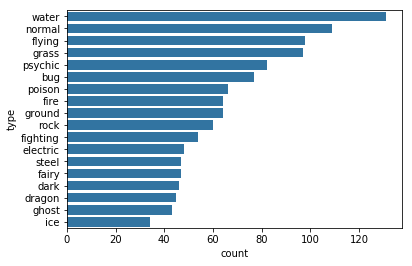

In [48]:
sb.countplot(data = pkmn_types, y = 'type', color = base_colour, order = type_order);

One method to change this to a relative comparison is to use matplotlib to change the tick values

In [54]:
n_pokemon = pokemon.shape[0] #returns the number of pokemon
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [57]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

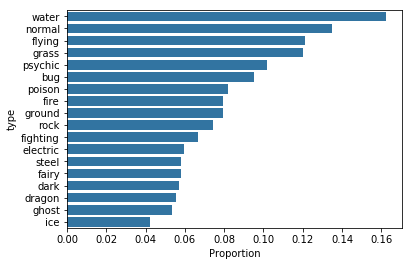

In [59]:
sb.countplot(data = pkmn_types, y = 'type', color = base_colour, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('Proportion');

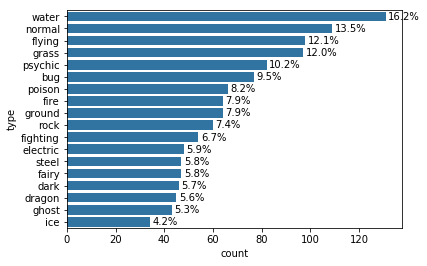

In [66]:
sb.countplot(data = pkmn_types, y = 'type', color = base_colour, order = type_order);

#We can also leave the x axis as counts and use a loop to print the proportion values onto each bar of the graph.

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_str = '{:.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_str, va = 'center');